In [1]:
import pandas as pd
import numpy as np

In [2]:
df= pd.read_csv('diabetes.csv')

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
df.isna().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [7]:
df.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [82]:
X= df[['DiabetesPedigreeFunction','Insulin','SkinThickness','BloodPressure','Glucose','Pregnancies','BMI','Age']]
Y= df['Outcome']

In [83]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,precision_score,recall_score,roc_auc_score,roc_curve,auc
import matplotlib.pyplot as plt
import seaborn as sns

In [85]:
X_train,X_test,Y_train,Y_test= train_test_split(X,Y,test_size=0.2,random_state=42)

In [86]:
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [87]:
X_train_scaled

array([[-0.49073479, -0.70120553, -1.32277365, ..., -0.52639686,
        -4.13525578, -1.03594038],
       [ 2.41502991, -0.70120553,  0.23350519, ...,  1.58804586,
        -0.48916881,  1.48710085],
       [ 0.54916055,  0.01344832, -0.09071957, ..., -0.82846011,
        -0.42452187, -0.94893896],
       ...,
       [ 1.981245  , -0.70120553,  1.07648956, ...,  1.8901091 ,
         1.76054443,  0.44308379],
       [-0.78487662, -0.70120553, -1.32277365, ..., -1.13052335,
         1.34680407, -0.33992901],
       [-0.61552223, -0.70120553, -1.32277365, ..., -1.13052335,
        -1.22614383, -1.03594038]])

In [88]:
X_test_scaled

array([[-0.11637247,  0.93474906,  0.81710976, ...,  0.68185612,
         0.26073561,  0.87809089],
       [-0.954231  , -0.70120553,  0.7522648 , ..., -0.52639686,
         0.48053518, -1.03594038],
       [-0.9245197 , -0.70120553, -1.32277365, ..., -0.52639686,
        -0.15300476, -1.03594038],
       ...,
       [ 0.04703966, -0.70120553, -1.32277365, ...,  1.28598261,
         0.62275843,  2.0961108 ],
       [-0.39268751,  2.3984979 ,  1.14133451, ..., -0.52639686,
        -0.51502758, -0.33992901],
       [ 0.70068816, -0.27930145,  1.27102442, ...,  1.28598261,
         0.42881763,  0.53008521]])

In [89]:
model= LogisticRegression()

In [90]:
model.fit(X_train_scaled,Y_train)

LogisticRegression()

In [91]:
Y_pred= model.predict(X_test_scaled)

In [92]:
CM= confusion_matrix(Y_test,Y_pred)
print('Confusion matrix \n',CM)

Confusion matrix 
 [[79 20]
 [18 37]]


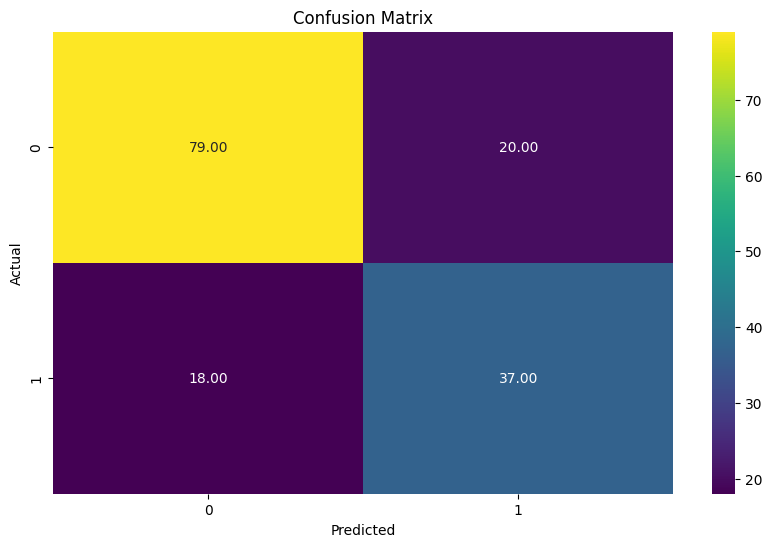

In [93]:
plt.figure(figsize=(10,6))
sns.heatmap(CM,annot=True,fmt=".2f",cmap='viridis')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [94]:
tp,tn,fp,fn=CM.ravel()
print('True Positive \t',tp)
print('True negative \t',tn)
print('False positive \t',fp)
print('False negative\t' ,fn)

True Positive 	 79
True negative 	 20
False positive 	 18
False negative	 37


In [95]:
accuracy= accuracy_score(Y_test,Y_pred)
precision= precision_score(Y_test,Y_pred)
recall= recall_score(Y_test,Y_pred)
accuracy= accuracy_score(Y_test,Y_pred)
precision= precision_score(Y_test,Y_pred)
recall= recall_score(Y_test,Y_pred)
tpr,fpr,threshold=roc_curve(Y_test,Y_pred)
auc_score=auc(tpr,fpr)
print('Accuracy \t', "{:.2f}".format(accuracy))
print('Precision \t', "{:.2f}".format(precision))
print('Recall    \t', "{:.2f}".format(recall))
print('AUC       \t', "{:.2f}".format(auc_score))

Accuracy 	 0.75
Precision 	 0.65
Recall    	 0.67
AUC       	 0.74
